In [1]:
from StatesDataset import StatesDataset
from torch.utils.data import DataLoader
from torchvision import utils
from matplotlib import pyplot as plt

# Params

In [2]:
data_path = '../data/states.pkl'
bs_train = 32
bs_test = 1000

# Load the data

In [3]:
data_train = StatesDataset(data_path)
data_test = StatesDataset(data_path, is_test=True)

In [4]:
data_train[1]

{'wave_function': array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 8.31482023e-04, ...,
          5.09067980e-07, 4.47322500e-10, 1.39129000e-11],
         [0.00000000e+00, 8.31482023e-04, 0.00000000e+00, ...,
          4.45729817e-07, 8.15065896e-07, 1.74345616e-08],
         ...,
         [0.00000000e+00, 5.09067980e-07, 4.45729817e-07, ...,
          0.00000000e+00, 4.98792816e-04, 5.13802240e-05],
         [0.00000000e+00, 4.47322500e-10, 8.15065896e-07, ...,
          4.98792816e-04, 0.00000000e+00, 1.75059361e-06],
         [0.00000000e+00, 1.39129000e-11, 1.74345616e-08, ...,
          5.13802240e-05, 1.75059361e-06, 0.00000000e+00]]]),
 'is_integrable': False,
 'mass_ratio': '1',
 'state_number': 51}

In [5]:
dl_train = DataLoader(data_train, batch_size=bs_train,
                        shuffle=True, num_workers=0)
dl_test = DataLoader(data_test, batch_size=bs_test,
                        shuffle=True, num_workers=0)

In [6]:
# Helper function to show a batch
def show_batch(sample_batched, nrow=6):
    """Show image with landmarks for a batch of samples."""
    images_batch, target_batch, state_num_batch, mass_ratio_batch = \
            sample_batched['wave_function'], sample_batched['is_integrable'], sample_batched['state_number'], sample_batched['mass_ratio']
    batch_size = len(images_batch)
    im_size = images_batch.size(2)
    grid_border_size = 2

    grid = utils.make_grid(images_batch, nrow=nrow, scale_each=True, normalize=True)[0]
    plt.imshow(grid.numpy().transpose((0, 1)))
    
    for i in range(batch_size):
        box_color = 'white' if target_batch[i].item() else 'red'
        plt.text(i%nrow * im_size + (i%nrow + 1) * grid_border_size,
                 (i//nrow) * im_size + (i//nrow+1) * grid_border_size,
                 "is_integrable="+str(target_batch[i].item())+"\nstate_number="+str(state_num_batch[i].item())+'\nmass_ratio='+str(mass_ratio_batch[i]),
                 bbox={'facecolor': box_color, 'alpha': 1, 'pad': 3},
                 verticalalignment='top', horizontalalignment='left',
                 fontsize=15)
        

    plt.title('Batch from dataloader')

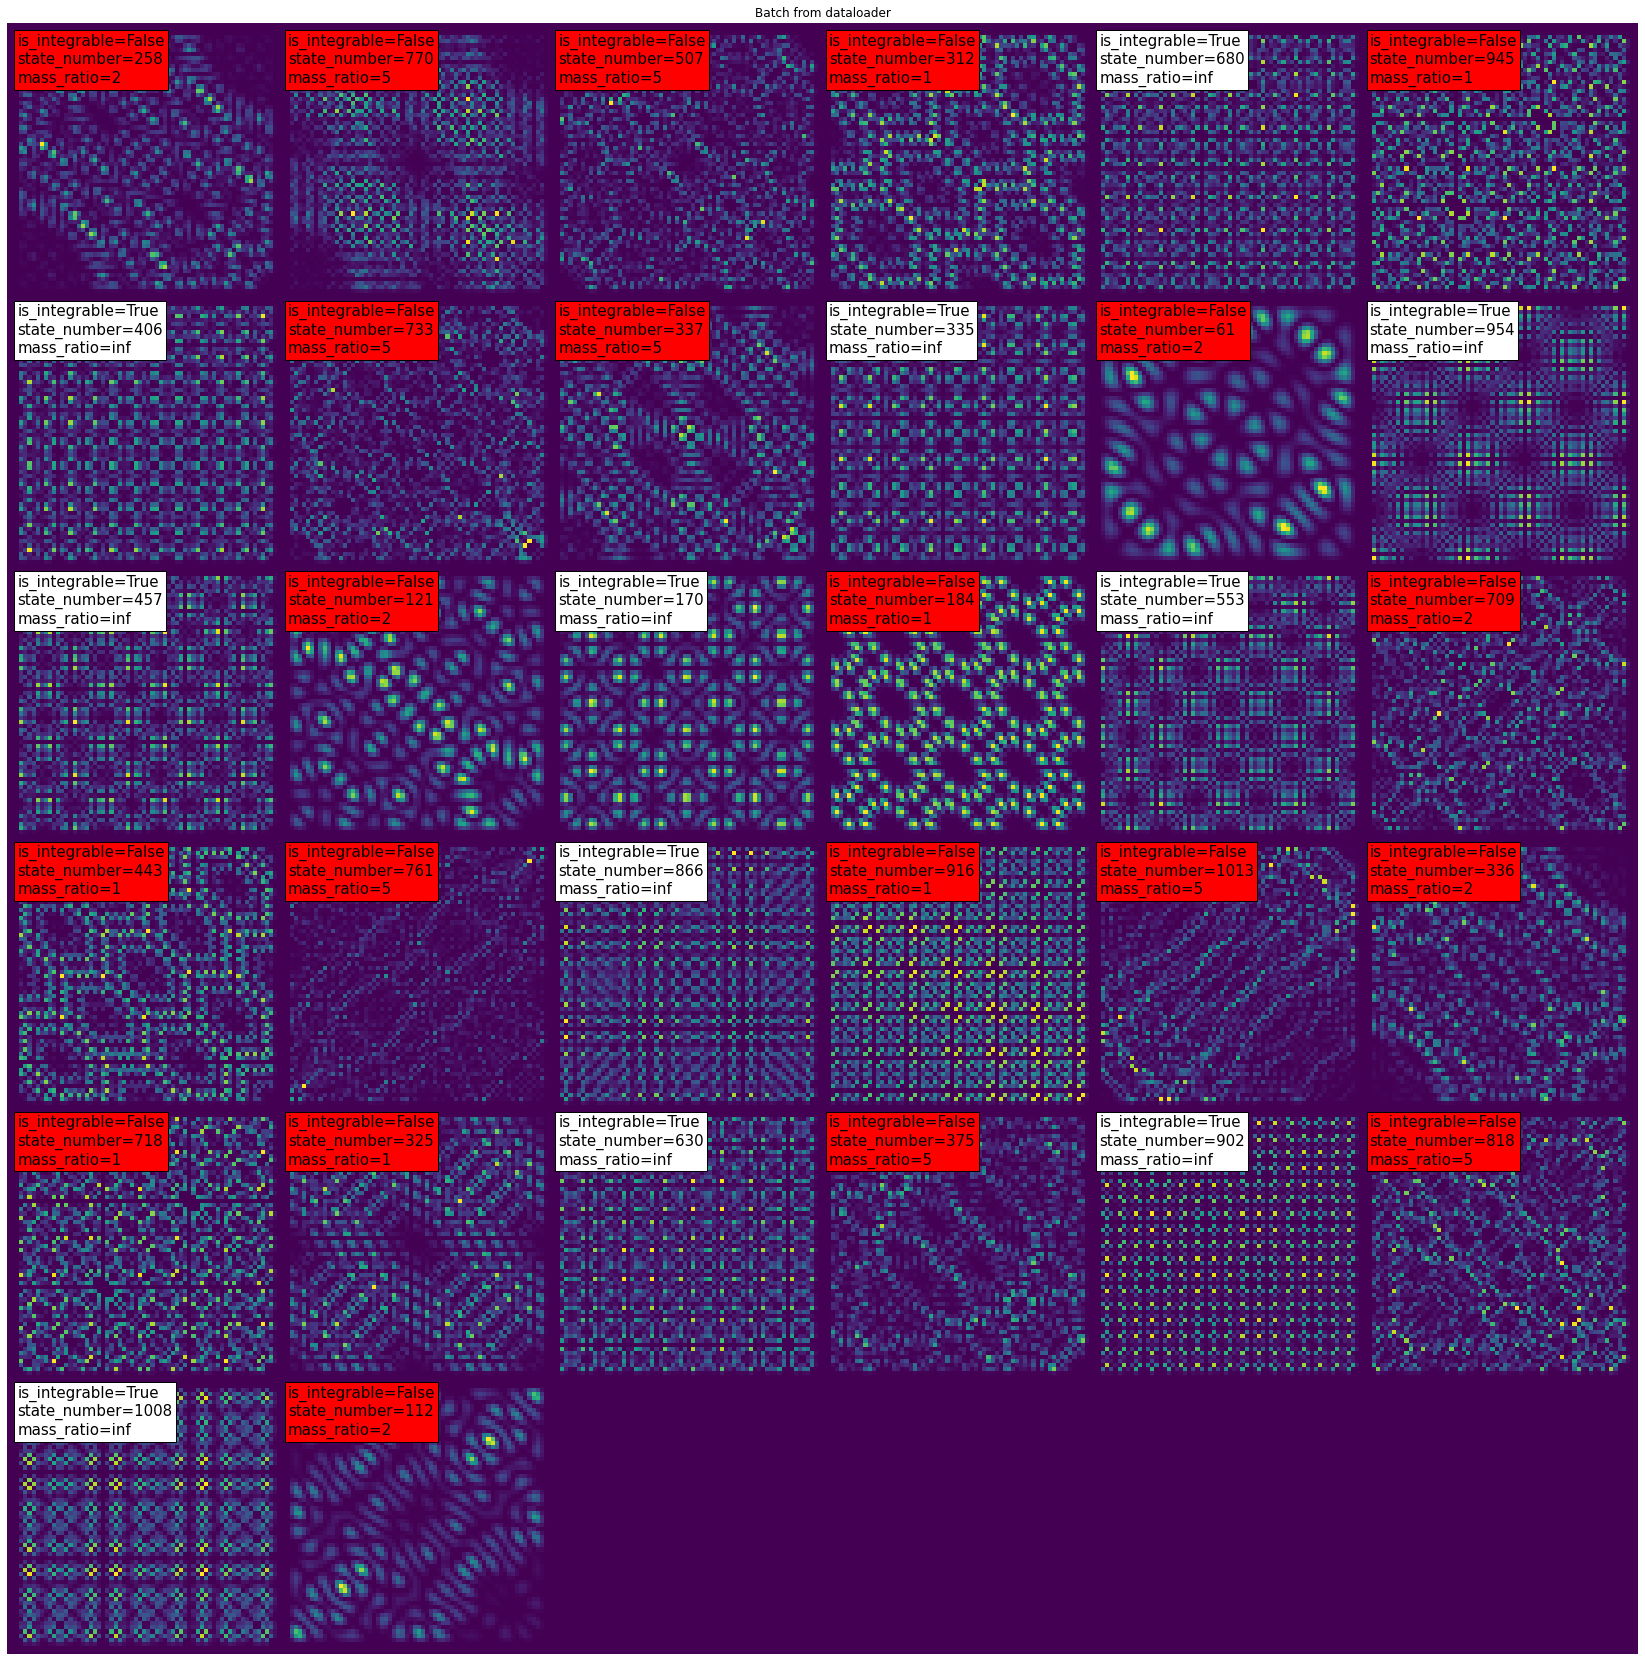

In [7]:
batch_id = 1
for i_batch, sample_batched in enumerate(dl_train):
    # observe a batch
    if i_batch == batch_id:
        plt.figure(figsize=(30,30))
        show_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break